In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [14]:
def get_lower_and_upper_bounds(col, multiplier = 1.5):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    
    iqr = q3 - q1
    
    inner_lower_fence = q1 - (multiplier * iqr)
    inner_upper_fence = q3 + (multiplier * iqr)
    
    return inner_lower_fence, inner_upper_fence

### Multiplier at 1.5

In [29]:
#Temperature
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Temperature)
inner_lower_fence, inner_upper_fence

(16.700000000000003, 104.7)

In [32]:
(df.Temperature < 16.7).sum()

1

In [33]:
#Rainfall
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Rainfall)
inner_lower_fence, inner_upper_fence

(0.26, 1.3)

In [34]:
(df.Rainfall < 0.26).sum()

0

In [35]:
#Flyers
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Flyers)
inner_lower_fence, inner_upper_fence

(4.0, 76.0)

In [36]:
(df.Flyers < 4.0).sum()

1

In [37]:
#Price
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Price)
inner_lower_fence, inner_upper_fence

(0.5, 0.5)

In [38]:
(df.Price < 0.5).sum()

0

In [39]:
#Sales
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Sales)
inner_lower_fence, inner_upper_fence

(5.0, 45.0)

In [40]:
(df.Sales < 5.0).sum()

0

- For the lower outliers, these numbers seem to make sense.

- Upper outliers make sense too.

### Multiplier at 3

In [24]:
#Temperature
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Temperature, 3)
inner_lower_fence, inner_upper_fence

(-16.299999999999997, 137.7)

In [25]:
#Rainfall
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Rainfall, 3)
inner_lower_fence, inner_upper_fence

(-0.13, 1.69)

In [26]:
#Flyers
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Flyers, 3)
inner_lower_fence, inner_upper_fence

(-23.0, 103.0)

In [27]:
#Price
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Price, 3)
inner_lower_fence, inner_upper_fence

(0.5, 0.5)

In [28]:
#Sales
inner_lower_fence, inner_upper_fence = get_lower_and_upper_bounds(df.Sales, 3)
inner_lower_fence, inner_upper_fence

(-10.0, 60.0)

- These fences are far too large for the data for both lower and upper bounds.

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

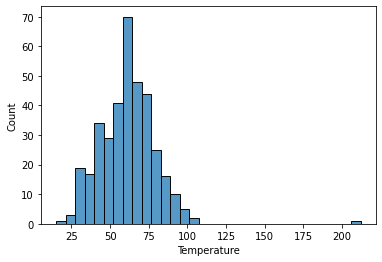

In [42]:
sns.histplot(df.Temperature)

<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

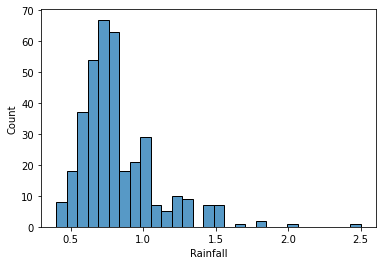

In [43]:
sns.histplot(df.Rainfall)

<AxesSubplot:xlabel='Flyers', ylabel='Count'>

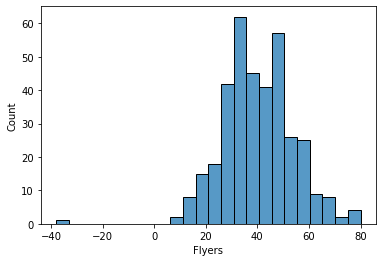

In [44]:
sns.histplot(df.Flyers)

<AxesSubplot:xlabel='Price', ylabel='Count'>

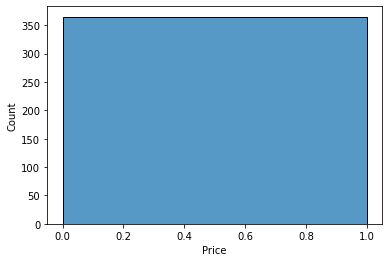

In [45]:
sns.histplot(df.Price)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

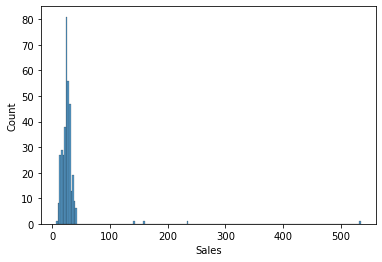

In [46]:
sns.histplot(df.Sales)